In [82]:
import pandas as pd
import numpy as np
from scipy import stats

In [90]:
data = pd.read_csv("C:\\Users\\nithy\\OneDrive\\Desktop\\DATA ENGINERRING ASSIGNMENT\\sales dataset1.csv")

In [84]:
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Date                0
Store ID            0
Product ID          0
Units Sold          5
Sales Amount        1
Discount Applied    3
Customer Segment    2
dtype: int64


In [94]:

# Replace NaN and infinite values in 'Units Sold' with 0 (or another appropriate value)
data['Units Sold'] = data['Units Sold'].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
data['Units Sold'] = data['Units Sold'].fillna(90).astype(int)  # Fill NaN with 0 and convert to int

# Repeat for other columns as needed
data['Sales Amount'] = data['Sales Amount'].replace([np.inf, -np.inf], np.nan).fillna(90).astype(float)
data['Discount Applied'] = data['Discount Applied'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)
data['Customer Segment'] = data['Customer Segment'].fillna('Unknown').astype(str)


In [95]:
data = data[(np.abs(stats.zscore(data[['Units Sold', 'Sales Amount', 'Discount Applied']])) < 3).all(axis=1)]

In [96]:
print(data.head())

         Date Store ID Product ID  Units Sold  Sales Amount  Discount Applied  \
0  01-11-2024     S001       P001          50        500.75              10.5   
1  01-11-2024     S002       P002           0       1200.50               5.0   
2  02-11-2024     S001       P002          60        750.00              15.0   
4  03-11-2024     S001       P001          30        300.50              10.0   
5  03-11-2024     S002       P003          45        450.75               0.0   

  Customer Segment  
0          Regular  
1          Premium  
2              New  
4          Premium  
5          Regular  


In [53]:
daily_sales = data.groupby('Date').agg({'Sales Amount': 'sum', 'Units Sold': 'sum'}).reset_index()
print(daily_sales.head())

        Date  Sales Amount  Units Sold
0 2024-11-01       1701.25         125
1 2024-11-02        750.00          60
2 2024-11-03       1900.75         110
3 2024-11-04       1200.50         120
4 2024-11-05       1800.00         110


In [54]:
store_sales = data.groupby('Store ID').agg({'Sales Amount': 'sum', 'Units Sold': 'sum'}).reset_index()
print(store_sales.head())

  Store ID  Sales Amount  Units Sold
0     S001      18601.75        1845
1     S002      21650.50        2050
2     S003      19450.25        1865


In [55]:
product_sales = data.groupby('Product ID').agg({'Sales Amount': 'sum', 'Units Sold': 'sum'}).reset_index()
print(product_sales.head())


  Product ID  Sales Amount  Units Sold
0       P001      20451.25        1975
1       P002      21950.75        2055
2       P003      17300.50        1730


In [45]:
total_sales = product_sales['Sales Amount'].sum()
average_sales_per_product = product_sales['Sales Amount'].mean()

In [46]:
top_store = store_sales.loc[store_sales['Sales Amount'].idxmax()]

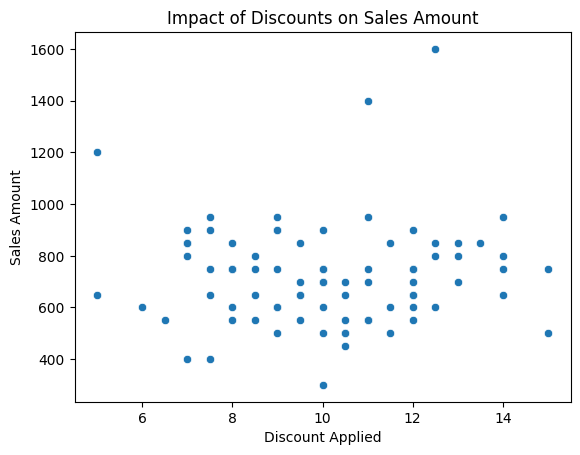

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='Discount Applied', y='Sales Amount')
plt.title('Impact of Discounts on Sales Amount')
plt.show()

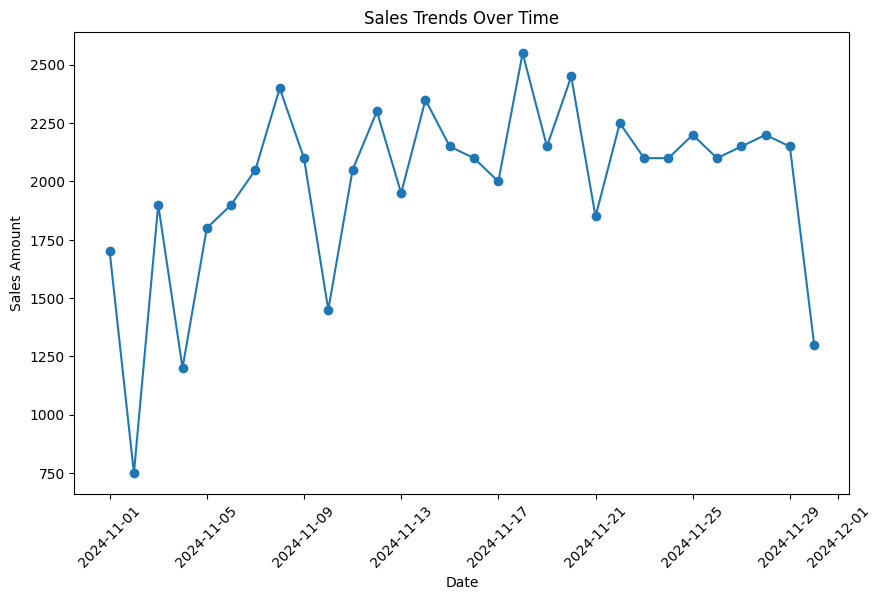

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales Amount'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

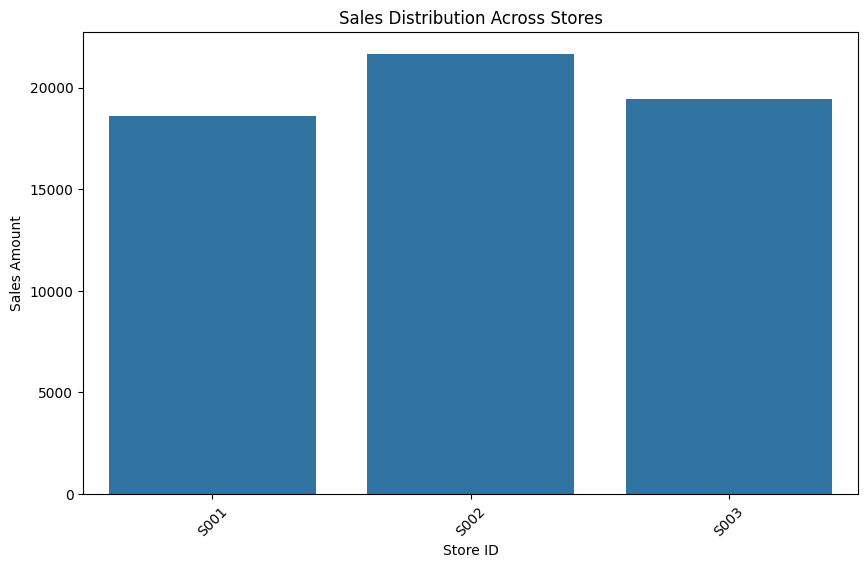

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Store ID', y='Sales Amount', data=store_sales)
plt.title('Sales Distribution Across Stores')
plt.xlabel('Store ID')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

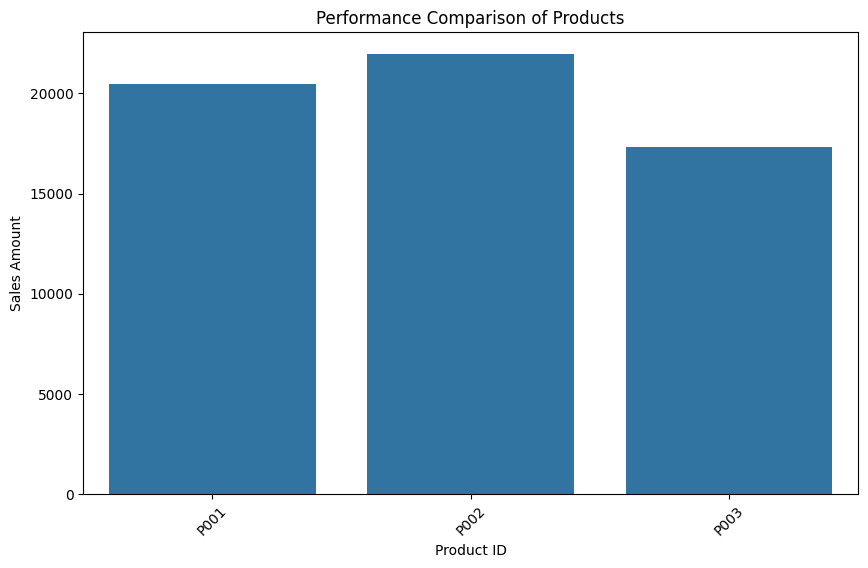

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product ID', y='Sales Amount', data=product_sales)
plt.title('Performance Comparison of Products')
plt.xlabel('Product ID')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()
